# Regression Models

In [23]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('../data/Asteroid_Normalized.csv')
data

,a,e,i,om,w,q,ad,per_y,H,pha,diameter,albedo,rot_per,GM,BV,UB,moid,n,per,ma
0,0.354908,0.213852,0.083238,0.393319,0.996385,0.379566,0.229142,0.259400,0.091219,0.0,0.533248,0.270352,0.010200,NaN,0.494970,0.543925,0.256055,0.136087,0.259400,0.784363
1,0.324537,0.227253,0.229741,0.385161,0.666141,0.350354,0.211422,0.232195,0.013615,0.0,0.926577,0.264221,0.004392,NaN,0.486922,0.521495,0.227563,0.154294,0.232195,0.239430
2,0.316424,0.258977,0.085688,0.721104,0.403507,0.331006,0.213728,0.225067,0.000000,0.0,1.000000,0.272965,0.004309,NaN,0.553320,0.680374,0.197683,0.159643,0.225067,0.390052
3,0.279029,0.174932,0.091367,0.308065,0.792483,0.335571,0.167190,0.192983,0.066712,0.0,0.737689,0.222111,0.007799,NaN,0.613682,0.689720,0.204244,0.187472,0.192983,0.541344
4,0.316486,0.137375,0.086519,0.191436,0.017794,0.381443,0.183041,0.225121,0.052417,0.0,0.950734,0.113568,0.003054,NaN,0.559356,0.702804,0.258631,0.159601,0.225121,0.769072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24363,0.308267,0.116138,0.063671,0.716155,0.952911,0.383182,0.172365,0.217959,0.693669,0.0,0.008184,0.355779,NaN,NaN,NaN,NaN,0.254284,0.165251,0.217959,0.477225
24364,0.313748,0.167089,0.065494,0.034126,0.549054,0.366897,0.188709,0.222728,0.714091,0.0,0.006280,0.418090,NaN,NaN,NaN,NaN,0.236695,0.161456,0.222728,0.370383
24365,0.376055,0.259840,0.161207,0.826406,0.196702,0.374582,0.256923,0.278815,0.618788,0.0,0.037268,0.038191,NaN,NaN,NaN,NaN,0.252686,0.124890,0.278815,0.165555
24366,0.364056,0.313769,0.090133,0.169786,0.754505,0.341206,0.263239,0.267752,0.625596,0.0,0.014599,0.267337,NaN,NaN,NaN,NaN,0.206996,0.131107,0.267752,0.399286


In [25]:
data.describe()

,a,e,i,om,w,q,ad,per_y,H,pha,diameter,albedo,rot_per,GM,BV,UB,moid,n,per,ma
count,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24368.000000,24350.000000,7194.000000,5.000000,973.000000,933.000000,24368.000000,24368.000000,24368.000000,24368.000000
mean,0.384303,0.152787,0.123026,0.467433,0.510014,0.432484,0.231263,0.290503,0.541543,0.001518,0.052751,0.197549,0.014414,0.204108,0.383437,0.457922,0.318695,0.129674,0.290503,0.498652
std,0.100205,0.077830,0.089446,0.278127,0.286434,0.098850,0.064902,0.102871,0.094566,0.038938,0.081149,0.132412,0.046370,0.444952,0.178334,0.179452,0.117802,0.044200,0.102871,0.286745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313935,0.097024,0.053856,0.238108,0.264011,0.366378,0.188615,0.222891,0.503063,0.000000,0.018507,0.075377,0.002790,0.000909,0.241449,0.315888,0.238954,0.095823,0.222891,0.253242
50%,0.369138,0.147363,0.100349,0.447274,0.516027,0.413475,0.222587,0.272422,0.557522,0.000000,0.029975,0.188945,0.004750,0.005601,0.331992,0.454206,0.296649,0.128431,0.272422,0.495898
75%,0.442614,0.199641,0.173277,0.679734,0.758522,0.489987,0.260145,0.342372,0.605174,0.000000,0.052354,0.283417,0.009192,0.014033,0.543260,0.596262,0.386115,0.161329,0.342372,0.745431
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
sel_data1 = data[['q', 'moid', 'H', 'diameter']]
sel_data1 = sel_data1.dropna()

sel_data1

,q,moid,H,diameter
0,0.379566,0.256055,0.091219,0.533248
1,0.350354,0.227563,0.013615,0.926577
2,0.331006,0.197683,0.000000,1.000000
3,0.335571,0.204244,0.066712,0.737689
4,0.381443,0.258631,0.052417,0.950734
...,...,...,...,...
24363,0.383182,0.254284,0.693669,0.008184
24364,0.366897,0.236695,0.714091,0.006280
24365,0.374582,0.252686,0.618788,0.037268
24366,0.341206,0.206996,0.625596,0.014599


## Linear Regression Model

In [27]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(sel_data1, test_size=0.2, random_state=42)


from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy import stats


X_train = train_df[['H']]
y_train = train_df['diameter']

X_test = test_df[['H']]
y_test = test_df['diameter']

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Linear- MSE: {mse}")

Linear- MSE: 0.0023006988577578217


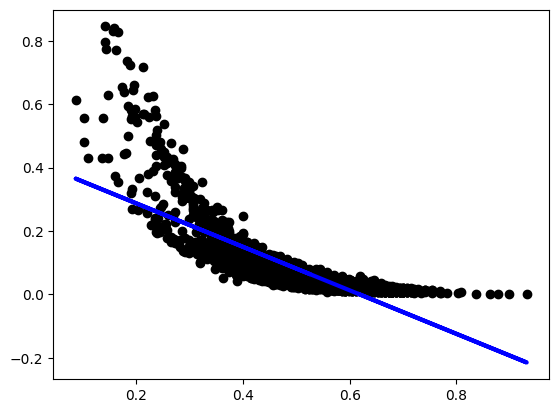

In [29]:
plt.scatter(X_test['H'], y_test, color="black")
plt.plot(X_test['H'], y_pred, color="blue", linewidth=3)

plt.show()

## Polynomial Regression

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


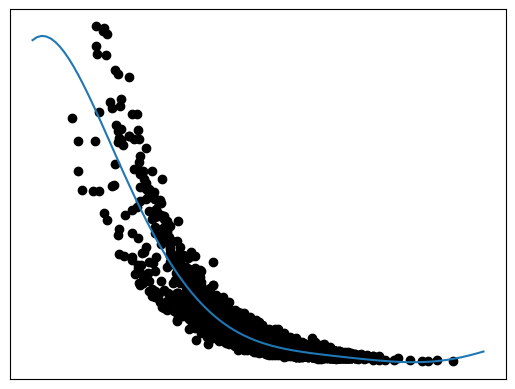

Degree 6 - Polynomial-Training MSE: 0.0008861995114971393, Polynomial-Testing MSE: 0.000843212857156944


In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


degree = 6
poly = PolynomialFeatures(degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

topplotx = np.linspace(X_train.min(), X_train.max(), 100)
topploty = model.predict(poly.transform(topplotx.reshape(-1, 1)))

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


plt.scatter(X_test, y_test, color="black")
plt.plot(topplotx, topploty)

plt.xticks(())
plt.yticks(())

plt.show()

print(f"Degree {degree} - Polynomial-Training MSE: {mse_train}, Polynomial-Testing MSE: {mse_test}")